In [1]:
from os import listdir, path, errno, makedirs
from shutil import copyfile
import pandas as pd
import numpy as np

import scipy

import cv2 as cv

import util

In [6]:
from scipy.signal import hilbert

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

In [200]:
from importlib import reload
reload(util)

<module 'util' from '/home/shsnail/approve/time_series_mining/TimeSeries_mid/util.py'>

In [202]:
f = "/home/shsnail/approve/time_series_mining/TimeSeries_mid/cropped/w/220px-Ash_Tree_-_geograph.org.uk_-_590710.jpg"

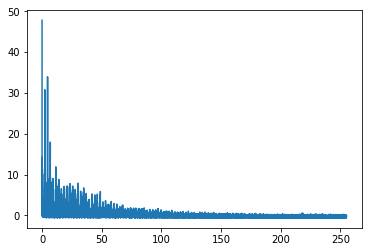

In [203]:
d = f
img = cv.imread(d, 0)

x, y, _, skel = util.to_timeseries(img, 220, 1, hilbert)
plt.plot(x, (y-y.mean())/y.std())

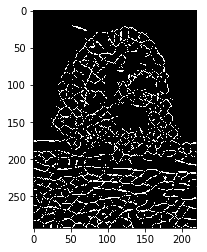

In [193]:
plt.imshow(skel, 'gray')

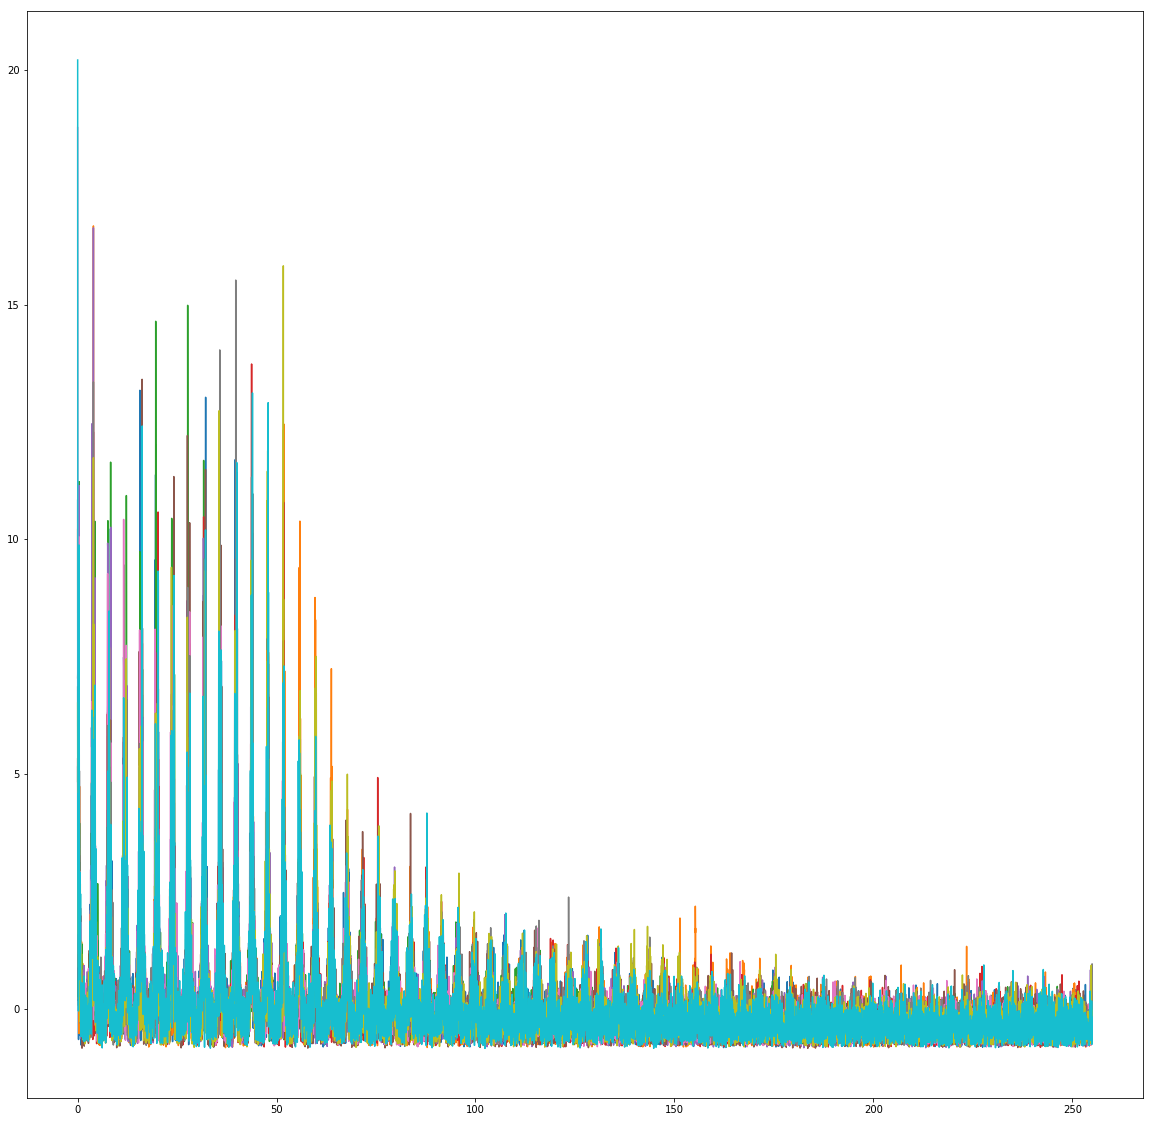

In [179]:
data_path = 'cropped/w'

# fig, axs = plt.subplots(2, 5, figsize=(20, 20))
plt.subplots(figsize=(20, 20))
count = 0
k = 0
for d in listdir(data_path):
    d = path.join(data_path, d)
    img = cv.imread(d, 0)
    
    x, y, _, skel = util.to_timeseries(img, 128, 1, hilbert)
#     conc = util.to_timeseries(img, 128, 500, hilbert)
    plt.plot(x, (y-y.mean())/y.std())
#     plt.plot(range(len(conc)), conc)
#     axs[k, count].imshow(skel, 'gray')
    
    count += 1
    if count > 4:
        k += 1
        count = 0


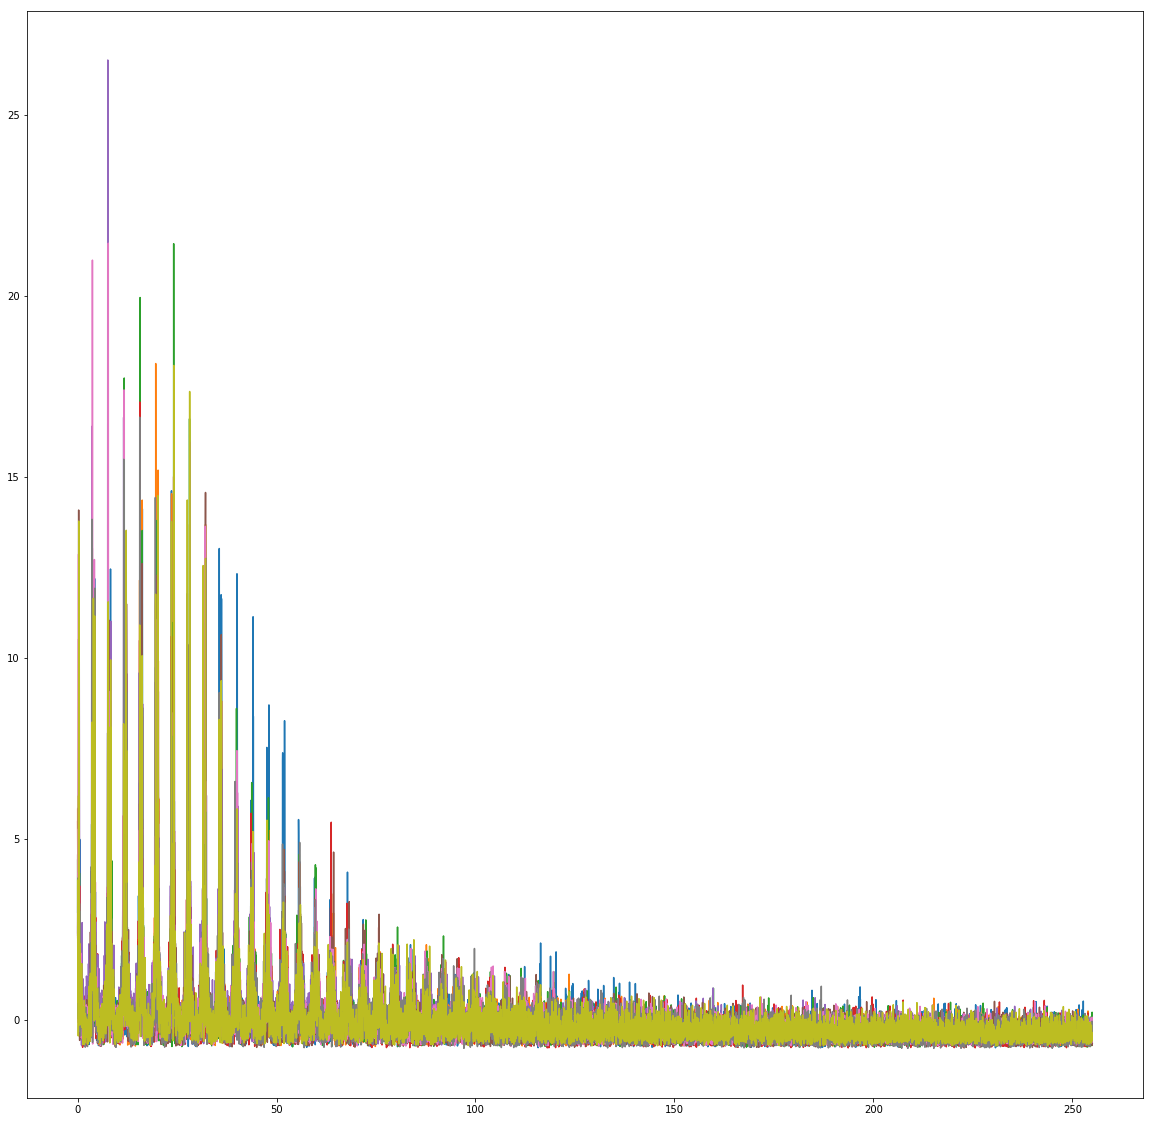

In [178]:
data_path = 'cropped/a'

# fig, axs = plt.subplots(2, 5, figsize=(20, 20))
plt.subplots(figsize=(20, 20))
count = 0
k = 0
for d in listdir(data_path):
    d = path.join(data_path, d)
    img = cv.imread(d, 0)
    
    x, y, _, skel = util.to_timeseries(img, 128, 1, hilbert)
#     conc = util.to_timeseries(img, 128, 500, hilbert)
    plt.plot(x, (y-y.mean())/y.std())
#     plt.plot(range(len(conc)), conc)
#     axs[k, count].imshow(skel, 'gray')
    
    count += 1
    if count > 4:
        k += 1
        count = 0


TypeError: unsupported operand type(s) for +: 'int' and 'str'

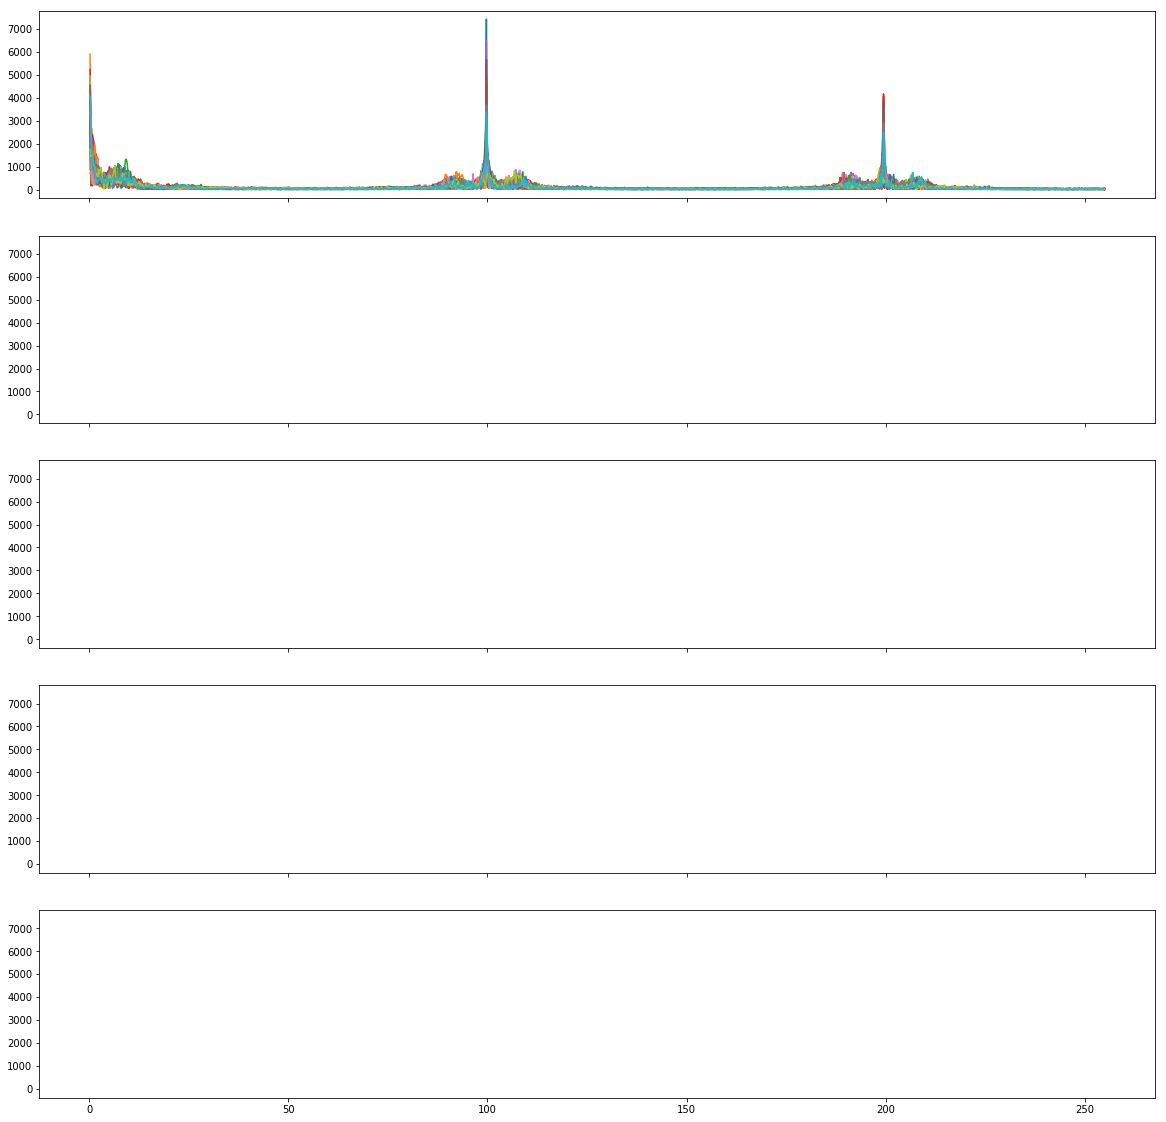

In [205]:
fig, axs = plt.subplots(5, figsize=(20, 20), sharey=True, sharex=True)
for i, c in enumerate(range(5)):
    
    for img in get_load_data_by_fing_func(c)(50):
        x, y, _, skel = util.to_timeseries(img, 512, 100, hilbert)
        axs[i].plot(x, y)
    print(i+'done')

fuck
fuck
fuck
fuck
fuck


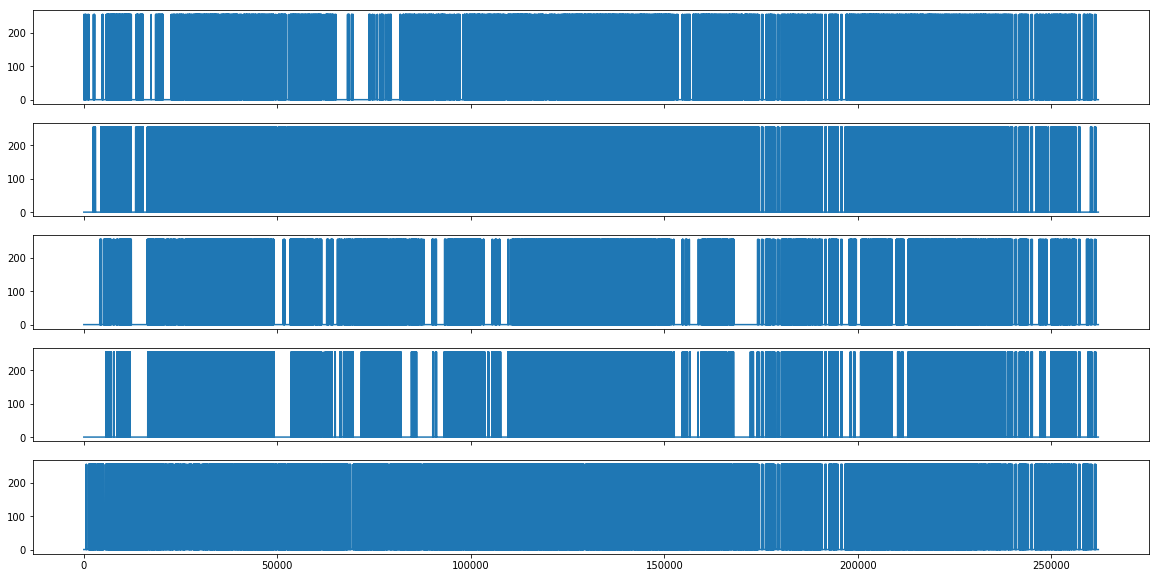

In [117]:
fig, axs = plt.subplots(5, figsize=(20, 10), sharey=True, sharex=True)
for i, c in enumerate(range(5)):
    
    for img in get_load_data_by_fing_func(c)(1):
        ts_x, ts_y, bf = util.to_timeseries(img, 2000, hilbert)
        ts_x = ts_x[10:]
        ts_y = ts_y[10:]
        bf = bf[10:]
        axs[i].plot(range(len(bf)), bf)
    print('fuck')

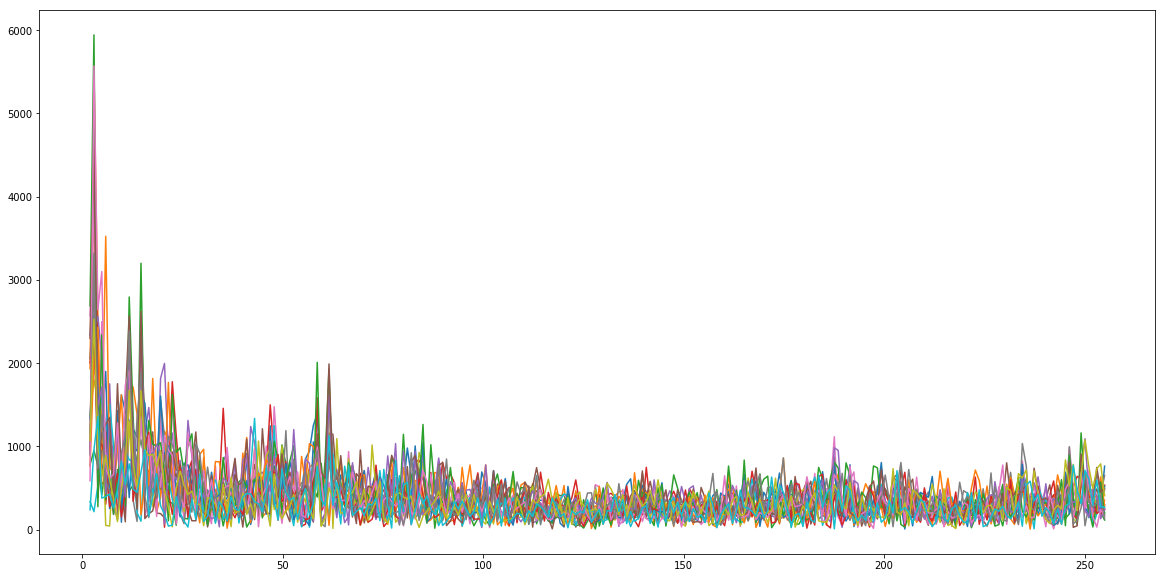

In [97]:
plt.subplots(figsize=(20, 10))
for img in util.get_load_data_by_class_func('r')(20):
    ts = util.to_timeseries(img, 500, hilbert)
    ts = list(map(lambda t: t[1:], ts))
    plt.plot(*ts)

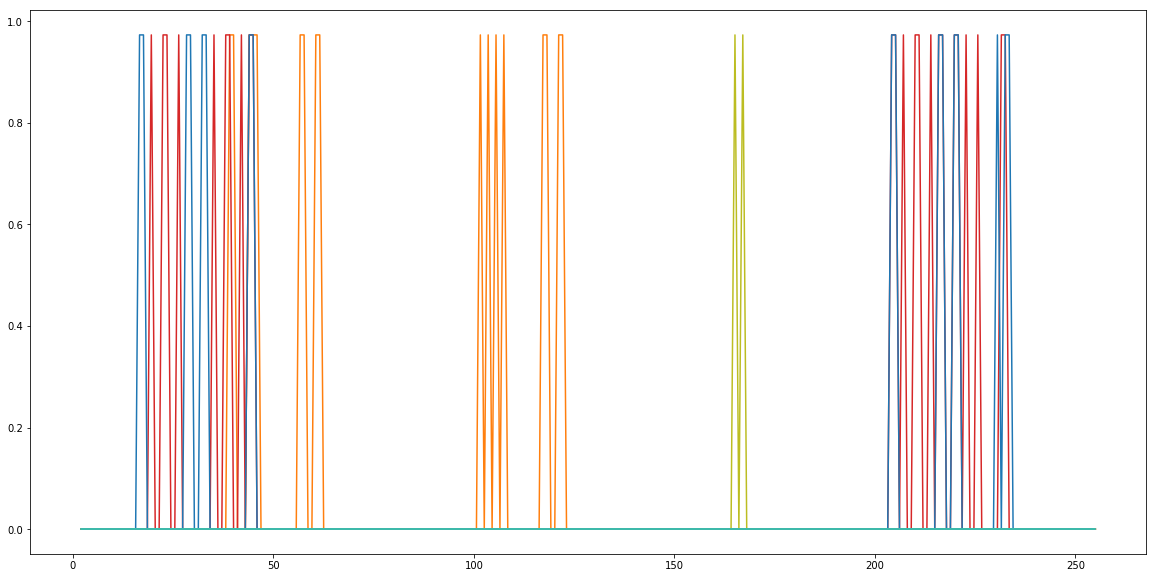

In [91]:
plt.subplots(figsize=(20, 10))
for img in util.get_load_data_by_class_func('l')(20):
    ts = util.to_timeseries(img, 500, hilbert)
    ts = list(map(lambda t: t[1:], ts))
    plt.plot(*ts)

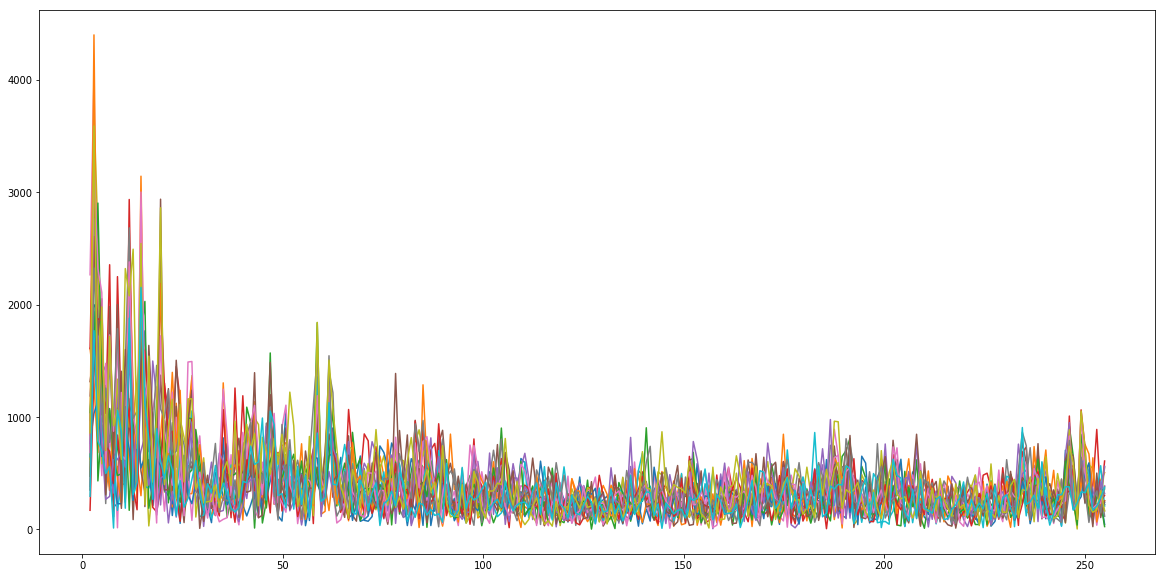

In [98]:
plt.subplots(figsize=(20, 10))
for img in util.get_load_data_by_class_func('t')(20):
    ts = util.to_timeseries(img, 500, hilbert)
    ts = list(map(lambda t: t[1:], ts))
    plt.plot(*ts)

In [70]:
hash_map = np.array([0]*(512*512))

In [78]:
for i in range(512):
    for j in range(512):
        hash_map[xy2d(512, i, j)] = img[i, j]

In [80]:
img

array([[187, 186, 185, ..., 183, 182, 179],
       [183, 185, 187, ..., 179, 179, 179],
       [182, 186, 188, ..., 183, 183, 186],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [81]:
hash_map

array([187, 186, 185, ..., 255, 255, 255])

In [68]:
def rot(n, t, rx, ry):
    if ry == 0:
        if rx == 1:
            t[0] = n-1 - t[0]
            t[1] = n-1 - t[1]
        t[0], t[1] = t[1], t[0]

def xy2d(n, x, y):
    d = 0
    s = n//2
    while s > 0:
        rx = (x&s) > 0
        ry = (y & s) > 0
        d += s * s * ((3 * rx) ^ ry)
        rot(s, [x, y], rx, ry)
        s//=2
    return d


In [69]:
for i in range(10):
    output = [0, 0]
    d2xy(512, 0, output)
    print(output)

0 0
[0, 0]
0 0
[0, 0]
0 0
[0, 0]
0 0
[0, 0]
0 0
[0, 0]
0 0
[0, 0]
0 0
[0, 0]
0 0
[0, 0]
0 0
[0, 0]
0 0
[0, 0]


In [62]:
xy2d(512, 1, 0)

3

In [110]:
def group_file_by_fing(data_root='data/'):
    df = pd.DataFrame(
        list(map(lambda t: (
            t[0].format('png'),
            int(t[0].split('/')[-1].split('.')[0].split('_')[-1]) % 5
        ), util.data_gen(data_root))),
        columns='file_path fing'.split()
    )

    for c in df.fing.unique():
        d = 'fing_group/fing_{}'.format(c)
        try:
            makedirs(d)
        except OSError as e:
            if e.errno != errno.EEXIST:
                raise
        files = df[df.fing == c].file_path
        for f in files:
            copyfile(f, path.join(d, f.split('/')[-1]))

            
def get_load_data_by_fing_func(fing, data_root='fing_group'):
    gen = gen_by_fing(fing, data_root)

    def wrapper(n):
        r = []

        for i in range(n):
            try:
                r.append(next(gen))
            except StopIteration:
                return r

        return r

    return wrapper


def gen_by_fing(fing, fing_group='fing_group'):
    file_path = path.join(fing_group, 'fing_{}'.format(fing))
    for f in listdir(file_path):
        f = path.join(file_path, f)

        yield cv.imread(f, 0)



341.35383145695437
294.0209699356624
319.38993782625903
339.4109176648916
309.1861949343222


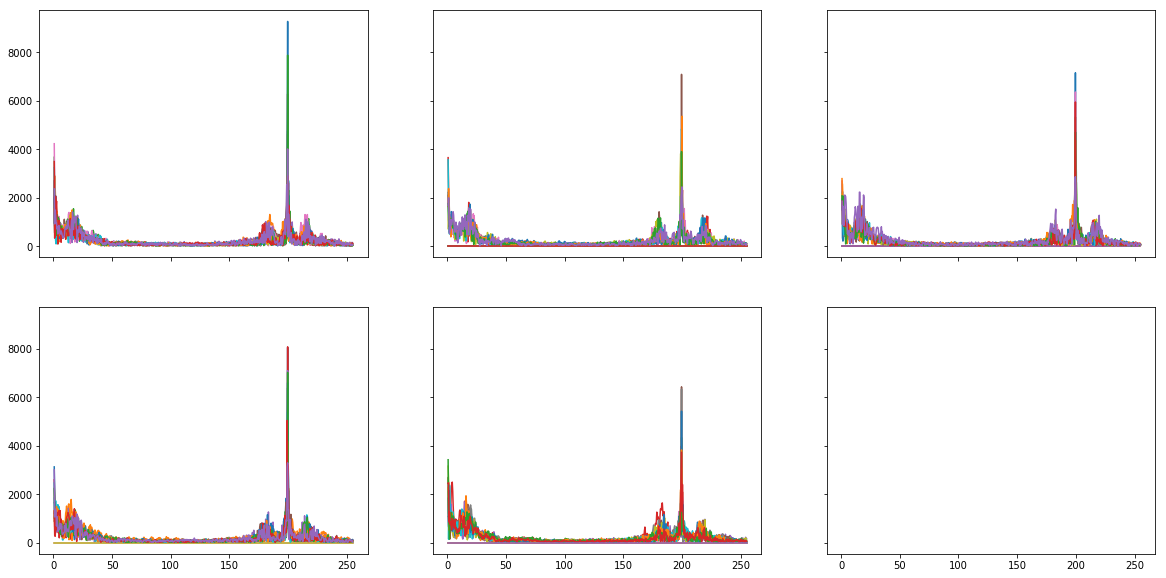

In [64]:
f, axs = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(20, 10))

k, count = 0, 0
for i in range(0, 5):
    coll = []
    for img in get_load_data_by_fing_func(i)(15):
        ts = util.to_timeseries(img, 200)
        coll.append(ts[1][1:])
        ts = (ts[0][1:],(ts[1][1:]))
        axs[k, count].plot(*ts)
    print(np.std(coll))
    
    count += 1
    if count > 2:
        k += 1
        count = 0

In [ ]:
scipy.va

In [52]:
ts = util.to_timeseries(img, 2000, scipy.signal.hilbert)

In [54]:
s = pd.Series(ts)

s.to_csv(pth)

In [67]:
scipy.misc.

AttributeError: module 'scipy' has no attribute 'signal'